<a href="https://colab.research.google.com/github/pranavteja/TSF_GRIP_Tasks/blob/main/GRIP_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRANAV TEJA - DATA SCIENCE AND BUSINESS ANALYTICS | GRIP @ THE SPARKS FOUNDATION 

TASK 3 - EXPLORATORY DATA ANALYSIS : RETAIL

In [14]:
import numpy as np                  #importing the prerequisite libraries
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
df = pd.read_csv('SampleSuperstore.csv')
df.drop( ['Postal Code','Country'],axis = 1, inplace =True)   #dropping the unnecessary columns
df.head()   #visualizing the data after dropping unnecessary columns

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [16]:
df.info()   #basic info of the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


In [17]:
df.describe()  #exploring the basics statistics of the dataset

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [18]:
df.isnull().sum()  #checking for null values

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [19]:
df2 = df.copy()                                          #creating the copy of dataset to work with

In [20]:
pd.crosstab(index=df2['Category'],columns='count')          #displaying the total count of each category
                                                                 

col_0,count
Category,
Furniture,2121
Office Supplies,6026
Technology,1847


In [21]:
pd.crosstab(index=df2['Segment'],columns='count')          #displaying the total count of each segment

col_0,count
Segment,
Consumer,5191
Corporate,3020
Home Office,1783


In [22]:
numerical_data=df2.select_dtypes(exclude=[object])          #numerical data
print(numerical_data.shape)

(9994, 4)


In [23]:
corr_matrix=numerical_data.corr()                      #finding the correlation of numerical data
corr_matrix                                         #displaying the correlation matrix                                                       

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


By the above correlation matrix, we understand that the strongest correlation occurs between profit and sales.
Quantity has a positive effect on Sales and Discount has a significantly high negative effect on the Profit obtained.

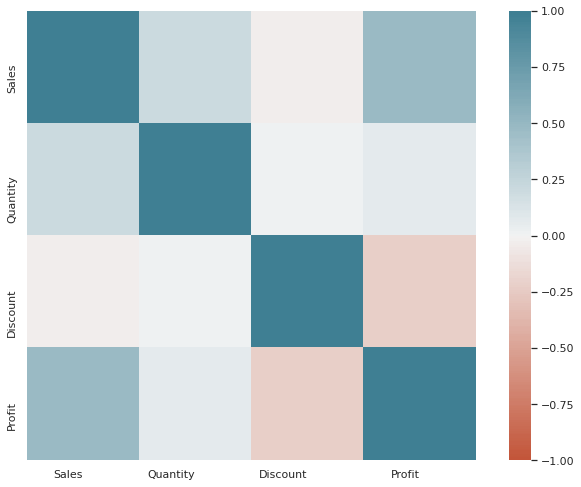

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})                 #visualing the correlation matrix 
ax=sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=0,        # using heatmap
               cmap=sns.diverging_palette(20,220,n=200),
               square=True)
ax.set_xticklabels(ax.get_xticklabels(),
                   horizontalalignment='right');

In [25]:
print(df2['Sales'].describe())

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


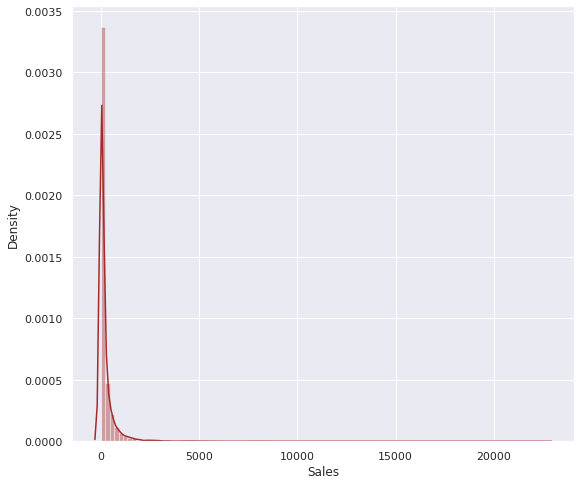

In [26]:
plt.figure(figsize=(9,8))                                #plotting the sales column
sns.distplot(df2['Sales'],bins=100,color='brown')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f90c11438>,
      dtype=object)

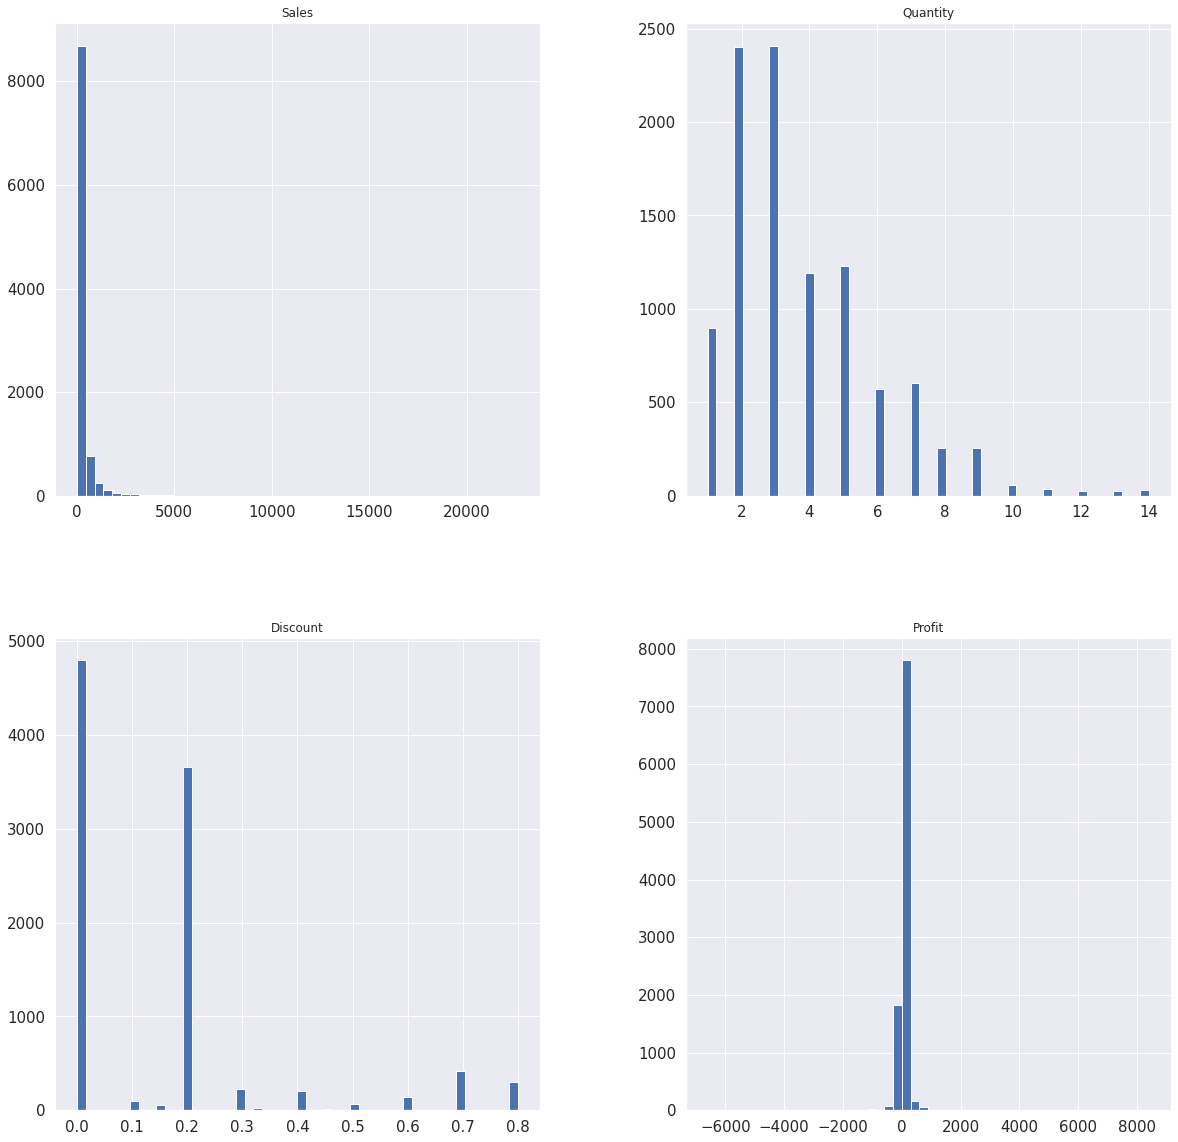

In [27]:
numerical_data.hist(figsize=(20,20),bins=50,xlabelsize=15,ylabelsize=15) #histogram distribution of various coulmns

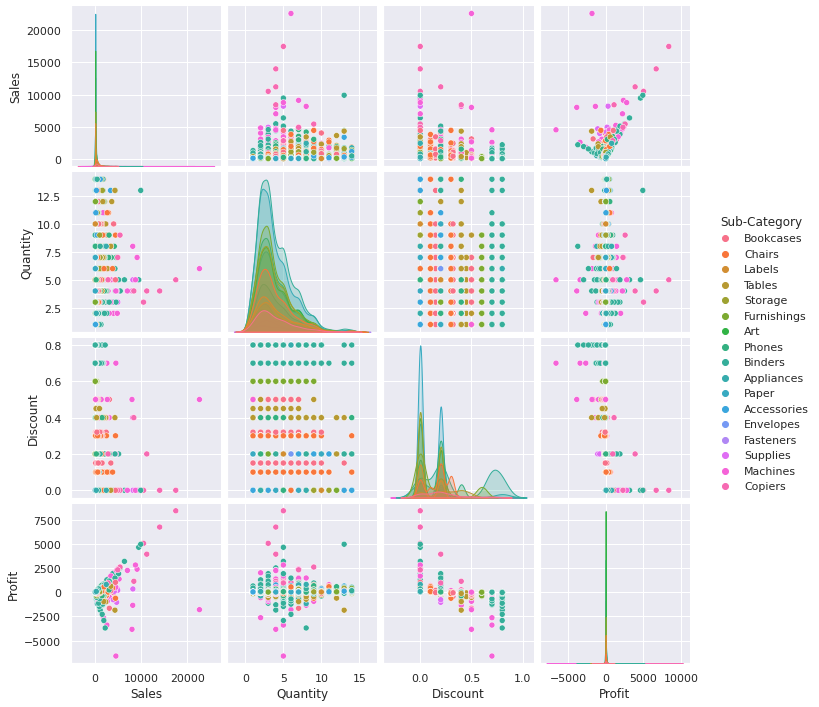

In [28]:
sns.pairplot(df2,hue="Sub-Category");    #generates pairplots by Sub- category

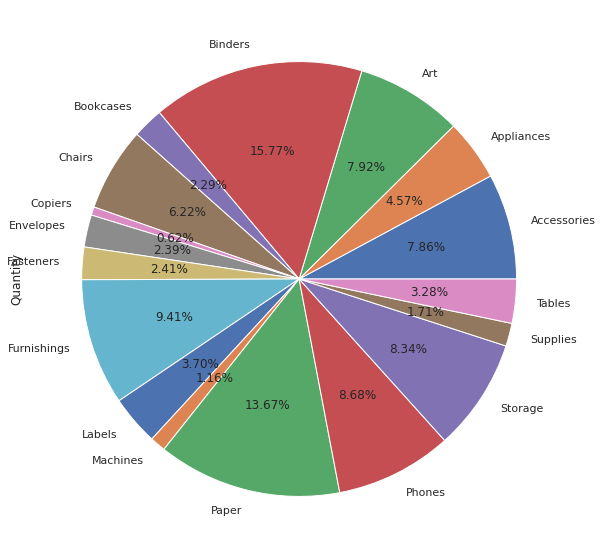

In [29]:
plt.figure(figsize=(10,10))
#df2['Sub-Category'].value_counts().plot.pie(autopct="%1.2f%%")       #visualising the count of each subcategory
df3 = df2.groupby(df2['Sub-Category']).sum()
df3['Quantity'].plot.pie(autopct="%1.2f%%")

The pie chart tells us that Paper and binders have the maximum quantity sold, followed by furnishings and phones

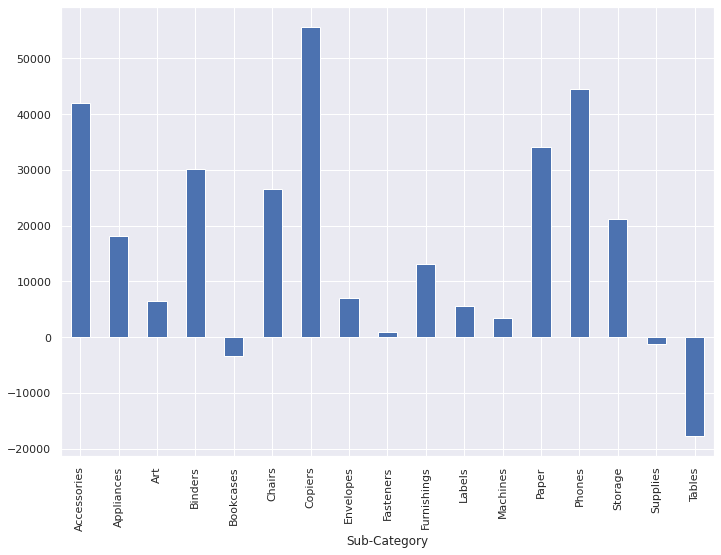

In [30]:
df3['Profit'].plot.bar()

A quick look at the above bar plot of Profit by Sub-Category reveals that Tables is the maximum loss-making sector and immediate changes should occur in this business and one may also consider the possibility of dropping this sector altogether. 

Bookcases and supplies have failed to generate profits, but they are not making significant losses either, suggesting that a little improvement in marketing and pricing could generate reasonable profits in the near future.

Our machines, labels, envelopes and art products are generating small profits, which means our products in these sectors are of good quality and satisfy our customers well. These sectors can now focus on improving the USP to generate higher profits.

All other sectors are doing really well and should continue their good work.

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'sales per category with its subcategory')

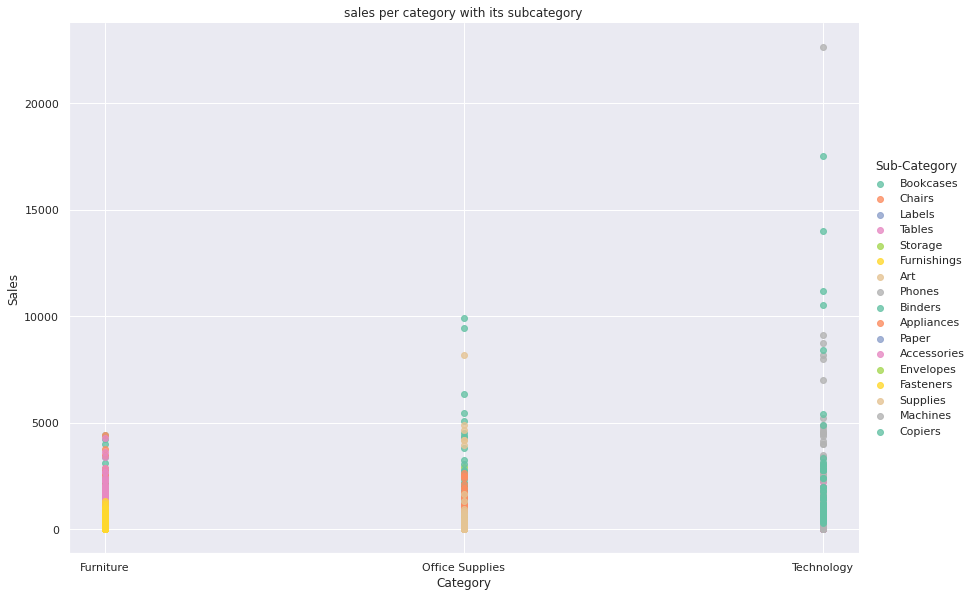

In [31]:
sns.lmplot(x='Category',y='Sales',data=df2,fit_reg=False,      #visualising the sales per catogory with
           hue='Sub-Category',legend=True ,                     # its subcategory   
           palette="Set2",size=8,aspect=15/10)
plt.title("sales per category with its subcategory")

From the above plot, it is evident that Technology is the maximum sales - generating category.

In [32]:
df2["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

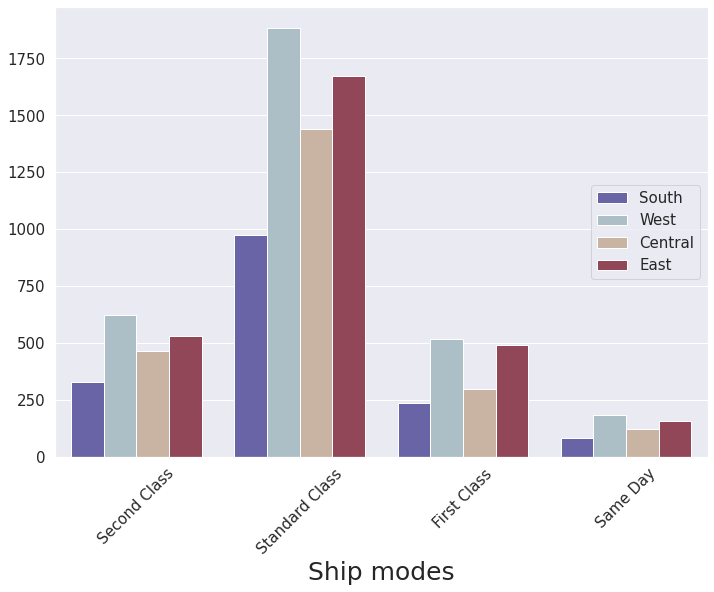

In [33]:
sns.countplot(x = 'Ship Mode', hue = 'Region', data = df2, palette = 'twilight_shifted')
plt.xticks(rotation=45,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Ship modes', fontsize = 25)
plt.ylabel('', fontsize = 15)
plt.legend(loc = 5, fontsize = 15);

From thie above graph, we understand that people prefer to use standard shipment mode a lot more frequently than others

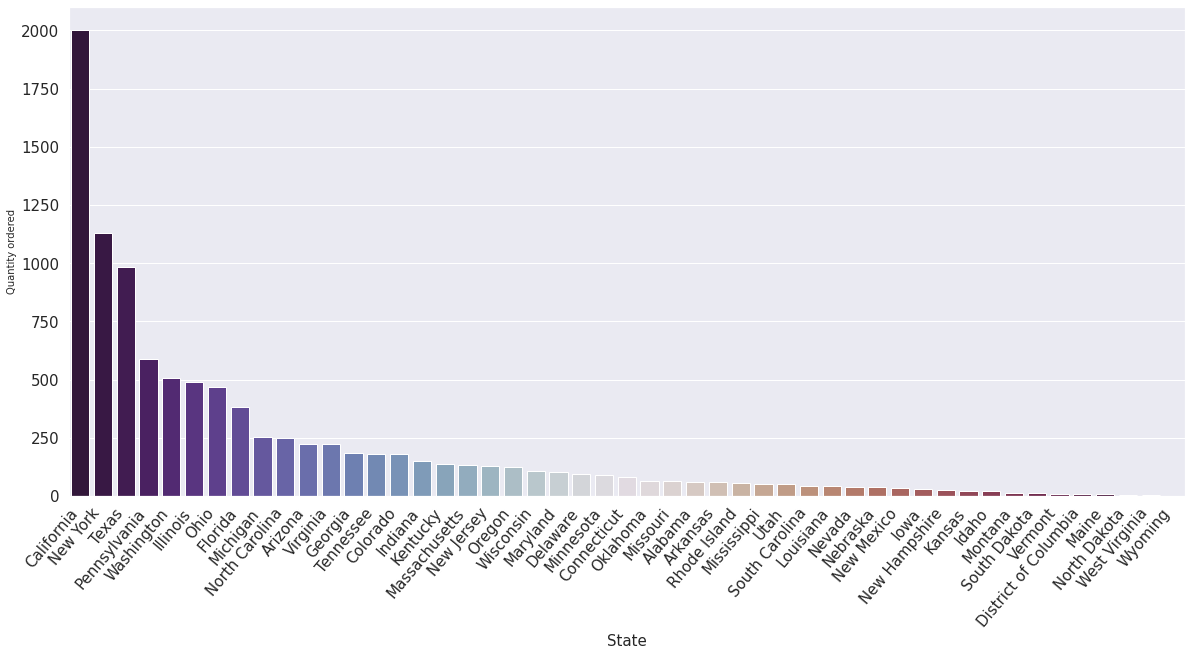

In [34]:
plt.figure(figsize = (20, 9))
sns.countplot(x = df2['State'],palette = 'twilight_shifted', order = (df2['State'].value_counts().head(50)).index)
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Quantity ordered', fontsize = 10);

Insight from above graph: California, New York and Texas have maximum sales among all the 50 of the United States of America.

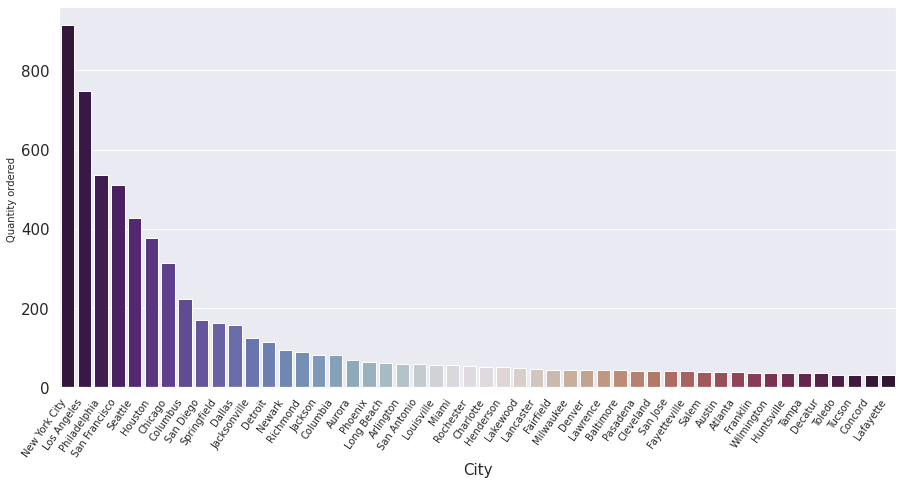

In [35]:
plt.figure(figsize = (15, 7))
sns.countplot(x = df2['City'],palette = 'twilight_shifted', order = (df2['City'].value_counts().head(50)).index)
plt.xticks(rotation = 55, ha = 'right', fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel('City', fontsize = 15)
plt.ylabel('Quantity ordered ', fontsize = 10);

Insight from above graph: New york city, Los Angeles have much higher sales than all other US cities. And this is somewhat evident from the fact that New york city and Los Angeles belong to the sales-topping states of California and New York

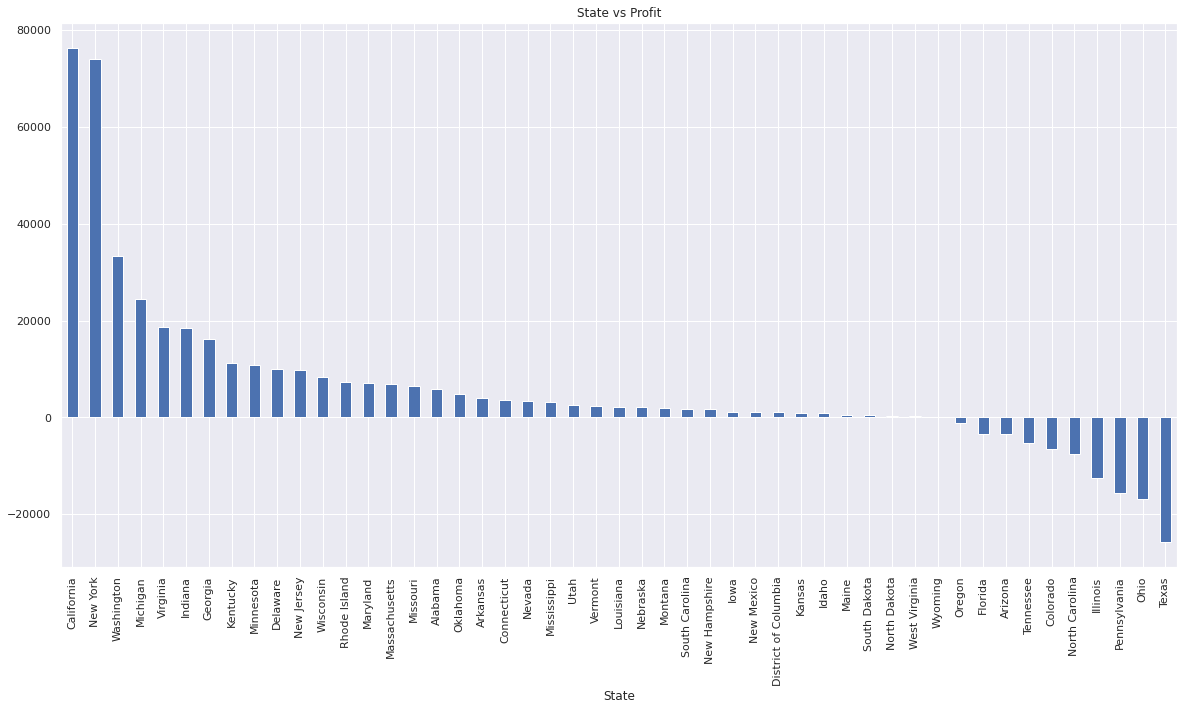

In [36]:
statewise=df2.groupby(['State'])['Profit'].sum()
statewise.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(20,10))
plt.title("State vs Profit")
statewise.plot.bar()

Here we have been able to identify those states where our businesses are making losses. So either the consumer confidence is poor in those states or our business must be revamped to suit their needs. We must sell only our best products in those regions as only they have some hope of making profits. This applies to the states of Texas, Ohio, Pennsylvania, Illinois, North Carolina, Tennessee, Arizona, Florida, Oregon and Wyoming. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


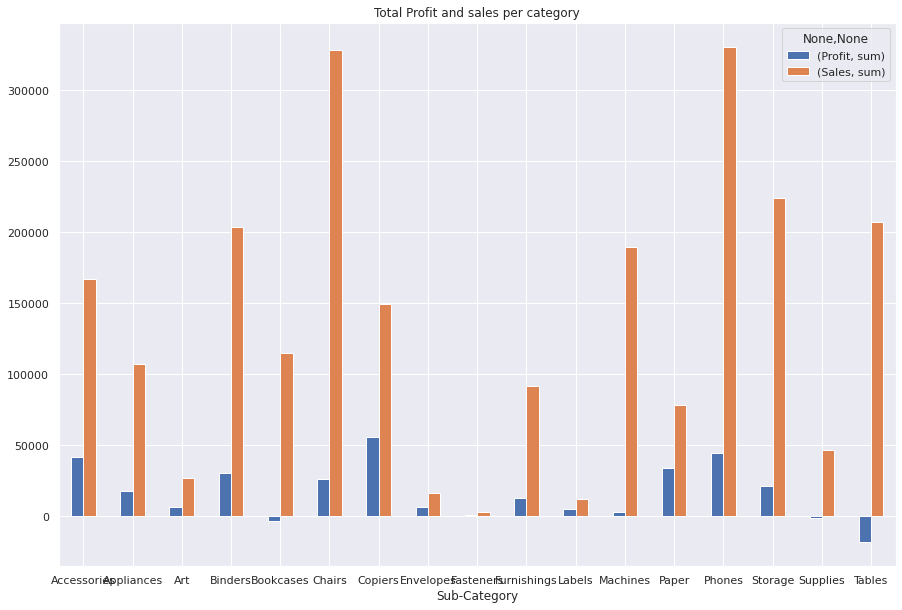

In [37]:
s=df2.groupby('Sub-Category')['Profit','Sales'].agg(['sum'])
s.plot.bar(rot=0, title="Total Profit and sales per category",figsize=(15,10));
plt.show(block=True);

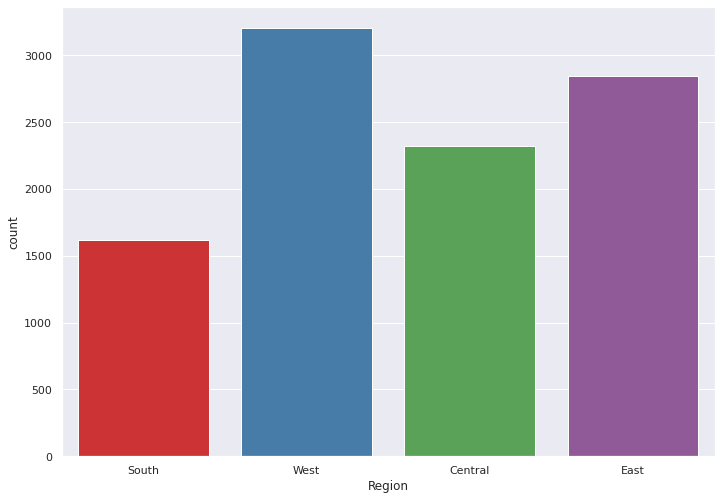

In [38]:
sns.set_style("darkgrid")
sns.countplot(x="Region",data=df2,palette="Set1")

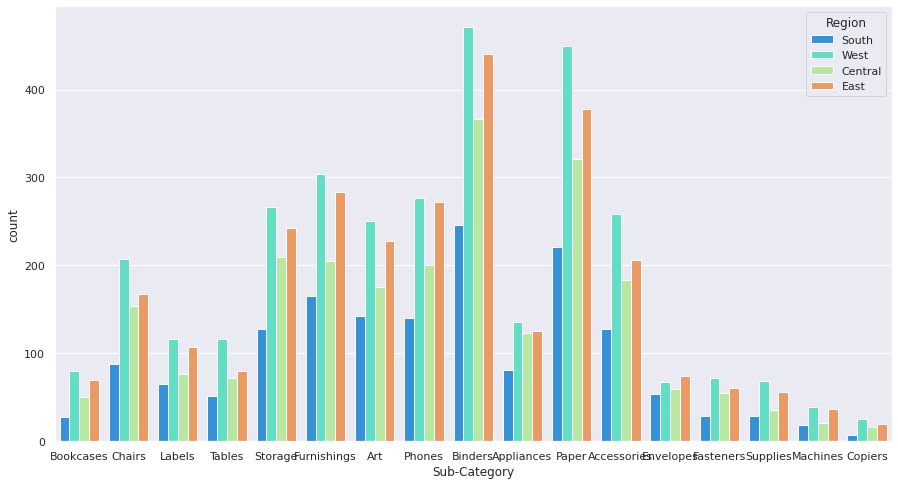

In [39]:
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df,palette="rainbow")
plt.show()

From the above count plot, we can conclude that people residing in the west region order more as compared to other regions

**Hence we were able to obtain some meaningful insights on our business processes using Exploratory Data Analysis. Thank you.**